# key-audio-latency-samples-at-48k


In [1]:
#packages
import pandas as pd
import numpy as np
from scipy.stats import levene
from scipy.stats import f_oneway
from scipy.stats import kruskal
from scipy.stats import ttest_ind
import matplotlib.pyplot as plt

In [2]:
#Load files
latencyPerAgent = []
for i in range(1, 9):
    latencyPerAgent.append(pd.read_csv('./FinalDatasets/key-audio-latency-samples-at-48k/key-audio-latency-'+ str(i) +'.csv'))

In [3]:
#Arrange per measurement group
import re

def extractGroup(name):    
    headers = []
    for i in range(8):
        headers.append(name + str(i+1))
    data = []
    for i in range(8):
        latencyPerAgent[i][name].name =str(i+1)
        data.append(latencyPerAgent[i][name])   
    return pd.concat(data, axis = 1)

def descriptive_stats(dataframe, div = 1.0, roundDec = 3, caption = 'Descriptive Statistics', label = 'tab:0'):
    stats = (dataframe.describe(include='all').transpose().filter (['min', '50%','mean', 'max', 'std']).set_axis(['Min.', 'Median', 'Mean', 'Max.', 'Std. Dev.'], axis = 1) / div).round(roundDec)
    latex = re.sub('<([^>]*)>', '\\\\textbf{\g<1>}',
           stats.rename(columns=lambda x: f'<{x}>').to_latex(column_format = '|c||c|c|c|c|c|', bold_rows = True, label = label))
    latex = latex.replace("{}", "\\textbf{Agent Size}")
    latex = latex.replace("\\toprule", "\\hline")
    latex = latex.replace("\\midrule", "\\hline \\hline")
    latex = latex.replace("\\bottomrule", "\\hline")
    latex = latex.replace("\\centering\n\\label{"+label+"}", "\\centering")
    latex = latex.replace("\\end{table}", "\\caption{"+caption+"}\n\\label{"+label+"}\n\\end{table}")
    latex = latex.replace("\\begin{table}", "\\begin{table}[H]")
    print(latex)
    return stats

\begin{table}[H]
\centering
\begin{tabular}{|c||c|c|c|c|c|}
\hline
\textbf{Agent Size} &  \textbf{Min.} &  \textbf{Median} &  \textbf{Mean} &  \textbf{Max.} &  \textbf{Std. Dev.} \\
\hline \hline
\textbf{1} &  34.083 &    40.562 &  42.067 &  53.562 &        6.004 \\
\textbf{2} &  27.188 &    38.427 &  38.802 &  50.667 &        6.445 \\
\textbf{3} &  25.938 &    36.198 &  37.162 &  50.146 &        6.783 \\
\textbf{4} &  23.312 &    39.625 &  38.760 &  53.000 &        8.036 \\
\textbf{5} &  26.438 &    37.333 &  38.073 &  50.417 &        6.812 \\
\textbf{6} &  26.625 &    38.938 &  38.724 &  50.792 &        6.731 \\
\textbf{7} &  22.312 &    35.833 &  36.922 &  51.792 &        7.829 \\
\textbf{8} &  26.458 &    39.073 &  39.810 &  52.292 &        7.049 \\
\hline
\end{tabular}
\caption{Descriptive statistic for latency from \emph{key} to \emph{direct sound} in milliseconds.}
\label{tab:latencykey}
\end{table}



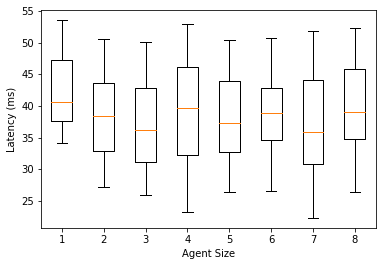

levene:
LeveneResult(statistic=0.6709813453105908, pvalue=0.6965409403535181)
Anova:
F_onewayResult(statistic=1.6172795118700132, pvalue=0.1313043307447195)
Mean all: 38.79
Std all: 6.961125


In [4]:
# FOR Key Direct

key_direct_all = extractGroup('key-direct')
key_direct_all.to_csv('keyDirect.csv')
stats = descriptive_stats(key_direct_all, 48.0, caption = 'Descriptive statistic for latency from \\emph{key} to \\emph{direct sound} in milliseconds.', label = 'tab:latencykey')

#Boxplots
boxdata = (key_direct_all.transpose().values / 48.0).tolist()
fig, ax = plt.subplots()
ax.boxplot(boxdata)
plt.xlabel('Agent Size')
plt.ylabel('Latency (ms)')
plt.savefig('figures/1-key-audio-latency-samples-at-48k-and-cpu/latency-key-direct-boxplot.pdf',  bbox_inches='tight')
plt.show()


d1, d2, d3, d4, d5, d6, d7, d8 = key_direct_all.transpose().values.tolist()
levene_result = levene(d1, d2, d3, d4, d5, d6, d7, d8)
print("levene:\n" + str(levene_result))
anova_result = f_oneway(d1, d2, d3, d4, d5, d6, d7, d8)
print("Anova:\n" + str(anova_result))
#direct_listener_all = extractGroup('direct-listener')
#artifacts_all = extractGroup('artifacts')

mean_all = stats['Mean'].mean() #(key_direct_all.sum().sum() / (key_direct_all.shape[0] * key_direct_all.shape[1]))/48.0
std_all = stats['Std. Dev.'].mean()
print("Mean all: " + str(mean_all))
print("Std all: " + str(std_all))

\begin{table}[H]
\centering
\begin{tabular}{|c||c|c|c|c|c|}
\hline
\textbf{Agent Size} &  \textbf{Min.} &  \textbf{Median} &  \textbf{Mean} &  \textbf{Max.} &  \textbf{Std. Dev.} \\
\hline \hline
\textbf{0} &   5.625 &     5.667 &   5.677 &    5.75 &        0.022 \\
\hline
\end{tabular}
\caption{Descriptive statistic for latency from \emph{direct sound} to \emph{listener} in milliseconds.}
\label{tab:latencylistener}
\end{table}



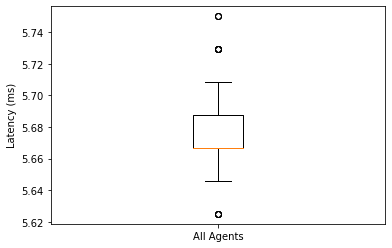

In [5]:
# FOR Direct - Listener

direct_listener_all = extractGroup('direct-listener').to_numpy().flatten()
direct_listener_all = pd.DataFrame(direct_listener_all)
descriptive_stats(pd.DataFrame(direct_listener_all), 48.0, caption = 'Descriptive statistic for latency from \\emph{direct sound} to \\emph{listener} in milliseconds.', label = 'tab:latencylistener')

#Boxplots
boxdata = (direct_listener_all.transpose().values / 48.0).tolist()
fig, ax = plt.subplots()
ax.boxplot(boxdata)
#plt.xlabel('All Agents')
plt.gca().set_xticklabels(['All Agents'])
plt.ylabel('Latency (ms)')
plt.savefig('figures/1-key-audio-latency-samples-at-48k-and-cpu/latency-direct-listener-boxplot.pdf', bbox_inches='tight')
plt.show()

In [6]:
# FOR artifacts

artifacts_all = extractGroup('artifacts')
print(np.mean(artifacts_all))
print(np.max(artifacts_all))

1    0.000000
2    0.000000
3    0.000000
4    0.000000
5    0.000000
6    0.000000
7    0.366667
8    0.900000
dtype: float64
1    0
2    0
3    0
4    0
5    0
6    0
7    3
8    4
dtype: int64


# CPU Usage

\begin{table}[H]
\centering
\begin{tabular}{|c||c|c|c|c|c|}
\hline
\textbf{Agent Size} &  \textbf{Min.} &  \textbf{Median} &  \textbf{Mean} &  \textbf{Max.} &  \textbf{Std. Dev.} \\
\hline \hline
\textbf{cpu\_1} &    14.0 &      16.0 &  16.939 &    22.0 &        1.547 \\
\textbf{cpu\_2} &    11.0 &      16.0 &  16.612 &    24.0 &        2.767 \\
\textbf{cpu\_3} &    13.0 &      24.0 &  23.327 &    31.0 &        3.913 \\
\textbf{cpu\_4} &    15.0 &      28.0 &  27.551 &    42.0 &        7.597 \\
\textbf{cpu\_5} &    14.0 &      25.0 &  26.857 &    50.0 &        7.608 \\
\textbf{cpu\_6} &    20.0 &      29.0 &  30.143 &    53.0 &        6.958 \\
\textbf{cpu\_7} &    15.0 &      27.0 &  27.612 &    50.0 &        7.751 \\
\textbf{cpu\_8} &    17.0 &      25.0 &  29.041 &    69.0 &       11.621 \\
\hline
\end{tabular}
\caption{Descriptive Statistics}
\label{tab:0}
\end{table}



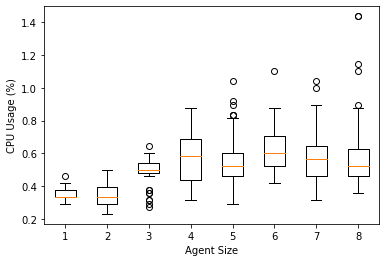

levene:
LeveneResult(statistic=9.802687785006164, pvalue=2.957416782892701e-11)
Anova:
KruskalResult(statistic=191.23950511264013, pvalue=8.204369579927572e-38)


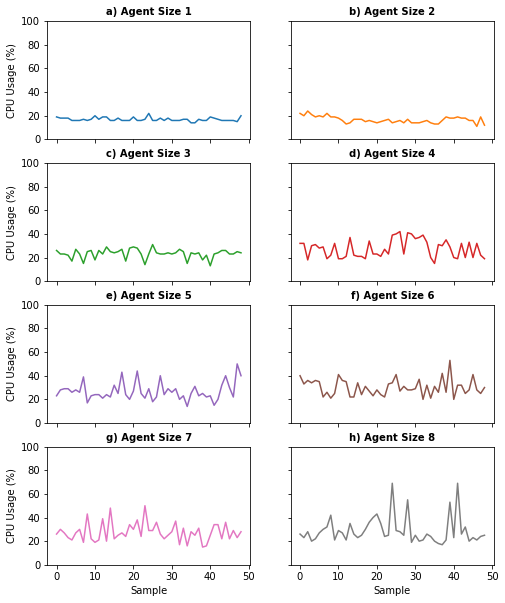

<Figure size 432x288 with 0 Axes>

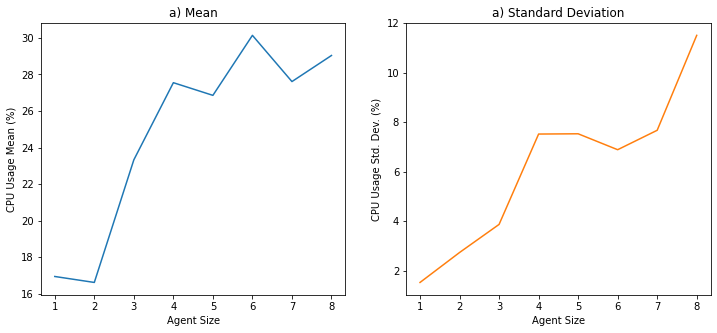

In [7]:
cpu_usage = pd.read_csv('./FinalDatasets/cpu-usage-percentage-count/cpu-usage-allagents.csv')
descriptive_stats(cpu_usage)

#Boxplots
boxdata = (cpu_usage.transpose().values / 48.0).tolist()
fig, ax = plt.subplots()
ax.boxplot(boxdata)
plt.xlabel('Agent Size')
plt.ylabel('CPU Usage (%)')
plt.savefig('figures/1-key-audio-latency-samples-at-48k-and-cpu/cpu-usage-boxplot.pdf',  bbox_inches='tight')
plt.show()

d1, d2, d3, d4, d5, d6, d7, d8 = cpu_usage.transpose().values.tolist()
levene_result = levene(d1, d2, d3, d4, d5, d6, d7, d8)
print("levene:\n" + str(levene_result))
anova_result = kruskal(d1, d2, d3, d4, d5, d6, d7, d8)
print("Anova:\n" + str(anova_result))

#Different plots
colors = plt.rcParams["axes.prop_cycle"]()
fig, axs = plt.subplots(4, 2, figsize=(8,10))
size = 0
for r in range(4):
    for c in range(2):
        size += 1 
        axs[r, c].plot(cpu_usage['cpu_' + str(size)], color = next(colors)["color"])
        axs[r, c].set_title(str(chr(96 + size)) + ') Agent Size ' + str(size), fontsize = 'medium', fontweight = 'heavy')
        axs[r, c].set_ylim([0, 100])
for ax in axs.flat:
    ax.set(xlabel='Sample', ylabel='CPU Usage (%)')
# Hide x labels and tick labels for top plots and y ticks for right plots.
for ax in axs.flat:
    ax.label_outer()
plt.savefig('figures/1-key-audio-latency-samples-at-48k-and-cpu/cpu-usage-allsizes.pdf',  bbox_inches='tight')
plt.show()


#Means and Std
colors = plt.rcParams["axes.prop_cycle"]()
means = np.mean(cpu_usage.transpose().values, axis = 1)
agentsize = np.arange(1,9,1)
stds = np.std(cpu_usage.transpose().values, axis = 1)
plt.figure()
fig, axs = plt.subplots(1, 2, figsize=(12,5))
axs[0].plot(agentsize, means, color = next(colors)["color"])
axs[0].set_title('a) Mean')
axs[0].set_xlabel('Agent Size')
axs[0].set_ylabel('CPU Usage Mean (%)')
axs[1].plot(agentsize, stds, color = next(colors)["color"])
axs[1].set_title('a) Standard Deviation')
axs[1].set_xlabel('Agent Size')
axs[1].set_ylabel('CPU Usage Std. Dev. (%)')
plt.savefig('figures/1-key-audio-latency-samples-at-48k-and-cpu/cpu-usage-mean-std.pdf',  bbox_inches='tight')
plt.show()
